In [1]:
#Global Header File

using LinearAlgebra             #   Linear Algebra 
using Kronecker                 #   For Kronecker Product 
using MKL                       #   MKL
using Plots, PyPlot             #   Plot Modules
using Random, Distributions     #   Random RandomMatrices
using RandomMatrices            #   Random Matrtices
using CSV, DelimitedFiles       #   File Management stuff
using DataFrames                #   File Management 
using ITensors
#using ITensorsVisualization     #   Packages for ITensors

In [2]:
#The spin 1 Algebra



#The X,Y,Z gates:


Z = [1 0 0; 0 0 0; 0 0 -1 ];
X = [0 1 0 ; 1 0 1; 0 1 0 ]/(sqrt(2));
Y = [0 -1im 0 ; im 0 -im; 0 im 0]/(sqrt(2));
S=  [0 1 0 ; 0 0 1; 1 0 0 ];

#The finite X,Y,Z Rotations:


function RX(r)
    exp(-im*r/2*X)
end


function RY(r)
    exp(-im*r/2*Y)
end


function RZ(r)
    exp(-im*r/2*Z)
end




V1=eigvecs(RX(4*pi/3));
V2=eigvecs(S);

UB=V1*conj(transpose(V2));
UBtr=V2*conj(transpose(V1));

L=UBtr*X*UB
#UBtr*RX(4*pi/3)*UB

function RS(r)
    exp(-im*r/2*L)
end

;

In [3]:
epsilon=0.0125
g=4*pi/3(1-epsilon);
XRow=copy(kronecker(RS(g),6));


In [9]:
h=rand(6)*pi/2;
J=rand(6)*pi/2;


#XRow=copy(kronecker(RX(o),RX(o),RX(o),RX(o),RX(o),RX(o)));
ZRow=copy(kronecker(RZ(h[1]),RZ(h[2]),RZ(h[3]),RZ(h[4]),RZ(h[5]),RZ(h[6])));

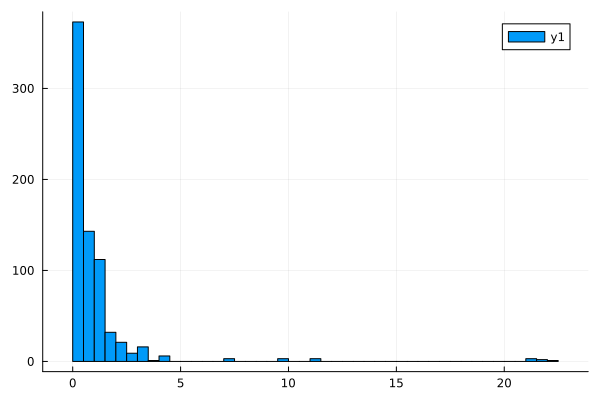

In [10]:
FU=fill(fill(0.1+im, 9,9), 5);

        

    theta=0.00;
    fone=copy(kronecker(Z,Z))
    Ltwo=copy(kronecker(exp(-im*theta/2*X),exp(-im*theta/2*X)))
    Lthree=copy(kronecker(exp(-im*theta/2*Y),exp(-im*theta/2*Y)))
 
    for j in 1:length(FU)
    FU[j]=Ltwo*Lthree*exp(-im*J[j]*fone);
    end


    
    UOdd=copy(kronecker(FU[1],FU[2],FU[3]));
    UEven=copy(kronecker(I(3),FU[4],FU[5],I(3)));


    A=XRow*UEven*UOdd
    
   
 
    
    
EigA=eigvals(A);

N=fill(0.1,length(EigA))
N=angle.(EigA);

N= sort(N,rev=true);


EigA1=copy(N);
ls = deleteat!(EigA1,1);
la = deleteat!(N,length(N));
m=copy(la-ls)/mean(la-ls)

histogram(m)



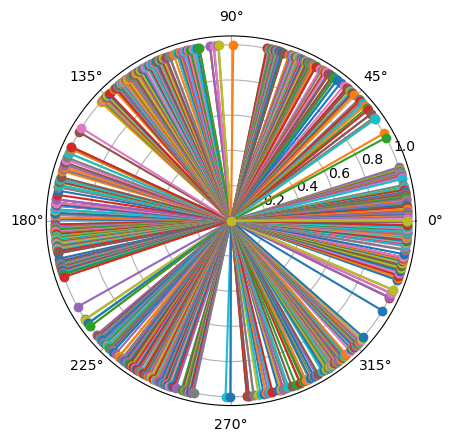

729-element Vector{Vector{PyCall.PyObject}}:
 [PyObject <matplotlib.lines.Line2D object at 0x00000190C7DBAD40>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000190C7DB9BA0>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000190C7DE4130>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000190C7DE4100>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000190C7DE43D0>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000190C7DE4BE0>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000190C7DE4A60>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000190C7DE4310>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000190C7DE4D60>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000190C7DE4EB0>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000190C7DBAE90>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000190C7DE5120>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000190C7DE5270>]
 ⋮
 [PyObject <matplotlib.lines.Line2D object at 0x00000190C7FD2A10>]
 [PyObject <ma

In [11]:
PyPlot.polar.(Base.vect.(0.0,angle.(EigA)),Base.vect.(0.0,abs.(EigA)),marker="o")

In [7]:
Zi=fill(fill(0.1+im, 729,729), 6);



Zi[1]=copy(kronecker(Z,I(3),I(3),I(3),I(3),I(3)));
Zi[2]=copy(kronecker(I(3),Z,I(3),I(3),I(3),I(3)));
Zi[3]=copy(kronecker(I(3),I(3),Z,I(3),I(3),I(3)));
Zi[4]=copy(kronecker(I(3),I(3),I(3),Z,I(3),I(3)));
Zi[5]=copy(kronecker(I(3),I(3),I(3),I(3),Z,I(3)));
Zi[6]=copy(kronecker(I(3),I(3),I(3),I(3),I(3),Z));

In [8]:
Cii_000000=fill(0.1, 6,15000);
Cii_000222=fill(0.1, 6,15000);
Cii_001122=fill(0.1, 6,15000);
Cii_012012=fill(0.1, 6,15000);
Cii_102122=fill(0.1, 6,15000);
Cii_020202=fill(0.1, 6,15000);
Cii_tr=fill(0.1,6,15000);

In [18]:
#At=I(729)
#Atdag=I(729)
#Adag=conj(transpose(A))

#At=A;
#Atdag=Adag;

#for t in 1:16
#    At=At*At;
#    Atdag=Atdag*Atdag;
#end

for t in 1:75000
    for l in 1:6
        LM=copy(Zi[l]*Atdag*Zi[l]*At);
        Cii_000000[l,t]=real(LM[1,1]);
        Cii_000222[l,t]=real(LM[27,27]);
        Cii_001122[l,t]=real(LM[45,45]);
        Cii_012012[l,t]=real(LM[141,141]);
        Cii_102122[l,t]=real(LM[315,315]);
        Cii_020202[l,t]=real(LM[183,183]);
        Cii_tr[l,t]=real(tr(LM));
    end
    At=A*At;
    Atdag=Atdag*Adag;
end

C_000000=fill(0.1,75000);
C_000222=fill(0.1,75000);
C_001122=fill(0.1,75000);
C_012012=fill(0.1,75000);
C_102122=fill(0.1,75000);
C_020202=fill(0.1,75000);
C_tr=fill(0.1,75000);


for i in 1:75000
    for
    j in 1:6
    C_000000[i]=C_000000[i]+Cii_000000[j,i];
    C_000222[i]=C_000222[i]+Cii_000222[j,i];
    C_001122[i]=C_001122[i]+Cii_001122[j,i];
    C_012012[i]=C_012012[i]+Cii_012012[j,i];
    C_102122[i]=C_102122[i]+Cii_102122[j,i];
    C_020202[i]=C_020202[i]+Cii_020202[j,i];
    C_tr[i]=C_tr[i]+Cii_tr[j,i];
end
end

xax =1:75000
Plots.plot(xax, C_tr[:]/6)

LoadError: BoundsError: attempt to access 6×15000 Matrix{Float64} at index [1, 15001]

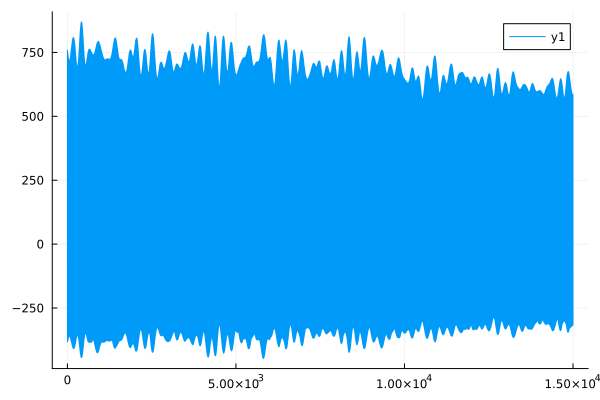

In [16]:
xax =1:15000
Plots.plot(xax, C_tr[:])

In [ ]:
gr();
 
#plot
#histogram(m)
xax=1:1000
Plots.plot(xax,Cii[5,:])
#save plot`
Plots.savefig("fig/DTC-3level-g_S-t20.png")

3×3 Matrix{ComplexF64}:
 -3.46945e-16+0.0im      -2.22045e-16+0.57735im   1.38778e-16-0.57735im
 -1.94289e-16-0.57735im   1.66533e-16+0.0im      -1.38778e-16+0.57735im
    1.249e-16+0.57735im  -1.66533e-16-0.57735im   6.10623e-16+0.0im

In [70]:
exp(im*L*2*pi/3)

3×3 Matrix{ComplexF64}:
  3.66504e-16-6.17402e-16im  …           1.0+6.40869e-16im
          1.0-3.32631e-16im     -3.58502e-16-5.51627e-16im
 -3.25821e-16-1.42998e-16im      3.66549e-16+2.59949e-16im

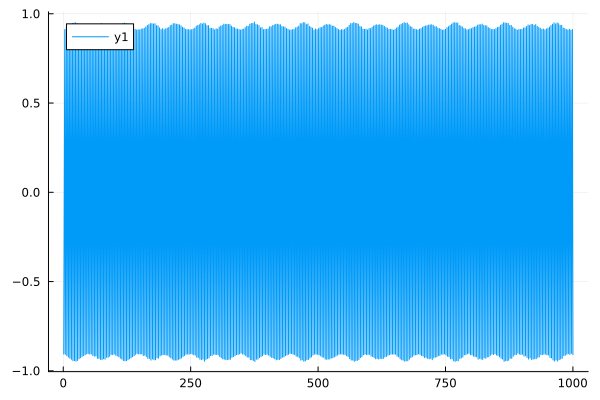

In [10]:
xax =1:1000
Plots.plot(xax, C[:]/6)

In [ ]:
CSV.write("Z_g_0.0125_000000_3.csv", Tables.table(C_000000/6), writeheader=false);
CSV.write("Z_g_0.0125_000222_3.csv", Tables.table(C_000222/6), writeheader=false);
CSV.write("Z_g_0.0125_012012_3.csv", Tables.table(C_012012/6), writeheader=false);
CSV.write("Z_g_0.0125_001122_3.csv", Tables.table(C_001122/6), writeheader=false);
CSV.write("Z_g_0.0125_102122_3.csv", Tables.table(C_102122/6), writeheader=false);
CSV.write("Z_g_0.0125_020202_3.csv", Tables.table(C_020202/6), writeheader=false);
CSV.write("Z_g_0.0125_tr_3.csv", Tables.table(C_tr/6), writeheader=false);

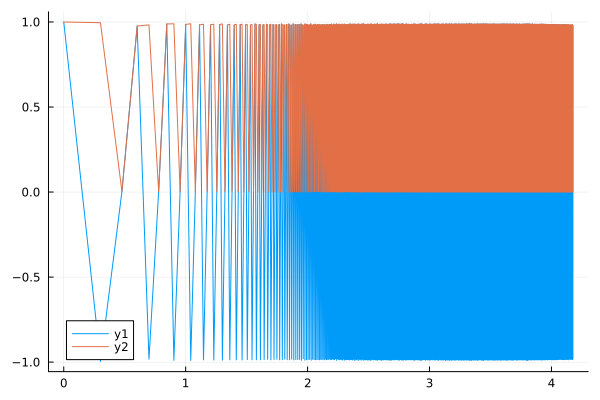

In [21]:
Plots.plot(log.(xax)/log(10),[C[:]/6,abs.(C[:])/6] )

In [2]:
C=readdlm("Z_1.csv",',',Float64);

In [6]:
Cenv=copy(C);

for i in 1:3:length(C)
    Cenv[i+2]=C[i+3];
end

LoadError: BoundsError: attempt to access 15000×1 Matrix{Float64} at index [15001]

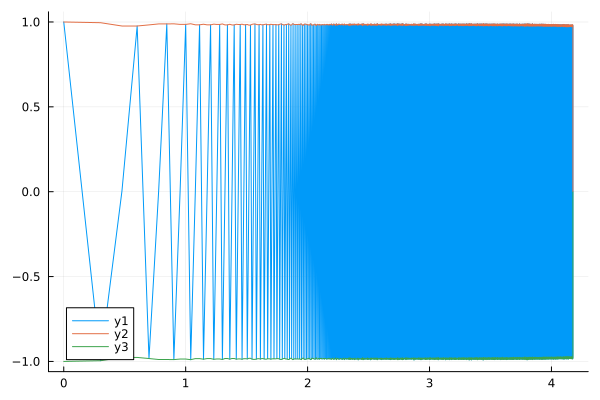

In [8]:
xax =1:15000
Plots.plot(log.(xax)/log(10),[C[:],abs.(Cenv[:]),-abs.(Cenv[:]),] )